<a href="https://colab.research.google.com/github/umiSirya/General-Data-analysis/blob/main/Numpy5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Exercise 5

### All of the questions in this exercise are attributed to rougier/numpy-100

In [2]:
import numpy as np

def find_nearest(array, value):
    array = np.array(array)  # Ensure the input is a numpy array
    idx = (np.abs(array - value)).argmin()  # Find the index of the nearest value
    return array[idx]  # Return the nearest value

# Example usage
array = [10, 22, 14, 26, 34, 45]
value = 20
nearest_value = find_nearest(array, value)
print("Nearest value to", value, "is", nearest_value)

Nearest value to 20 is 22


#### 61. Find the nearest value from a given value in an array (★★☆)

In [ ]:
def find_nearest(array, target):
    # Find the nearest value in the array to the target
    nearest = min(array, key=lambda x: abs(x - target))
    return nearest

# Example usage
array = [10, 22, 14, 26, 34, 45]
target = 20
nearest_value = find_nearest(array, target)
print("Nearest value to", target, "is", nearest_value)


Nearest value to 20 is 22


#### 62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator? (★★☆)

In [ ]:


# Define the arrays
array1 = np.array([[1, 2, 3]])  # Shape (1, 3)
array2 = np.array([[4], [5], [6]])  # Shape (3, 1)

# Create an iterator to compute the sum element-wise
result = np.empty((3, 3))  # Initialize an empty array to store the results
it = np.nditer([array1,array2, result], flags=['multi_index', 'refs_ok'], op_flags=[['readonly'], ['readonly'], ['writeonly']])

# Perform the element-wise addition using the iterator
for x, y, z in it:
    z[...] = x + y

# Display the result
print("Resultant Array:\n", result)



Resultant Array:
 [[5. 6. 7.]
 [6. 7. 8.]
 [7. 8. 9.]]


#### 63. Create an array class that has a name attribute (★★☆)

In [ ]:
class NamedArray:
    def __init__(self, data, name="Unnamed Array"):
        # Initialize with data and name
        self.data = np.array(data)
        self.name = name

    def __repr__(self):
        # Custom representation to display the name and array data
        return f"{self.name}:\n{self.data}"

    def __add__(self, other):
        # Support element-wise addition with another NamedArray or NumPy array
        if isinstance(other, NamedArray):
            other = other.data
        return NamedArray(self.data + other, name=f"{self.name} + {other.name if isinstance(other, NamedArray) else 'Array'}")

    # Add other array-like methods as needed, for example, accessing elements:
    def __getitem__(self, index):
        return self.data[index]

# Example usage
array1 = NamedArray([[1, 2, 3]], name="Array1")
array2 = NamedArray([[4], [5], [6]], name="Array2")

# Print arrays
print(array1)
print(array2)

# Perform addition and print result
result = array1 + array2
print(result)

Array1:
[[1 2 3]]
Array2:
[[4]
 [5]
 [6]]
Array1 + Array:
[[5 6 7]
 [6 7 8]
 [7 8 9]]


#### 64. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (★★★)

In [ ]:
vector = np.array([10, 20, 30, 40, 50])
indices = np.array([0, 1, 1, 2, 4])  # Note: index 1 is repeated

# Increment each element in 'vector' at the positions specified by 'indices'
np.add.at(vector, indices, 1)

# Display the result
print("Updated vector:", vector)

Updated vector: [11 22 31 40 51]


#### 65. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)? (★★★)

In [ ]:
X = np.array([5, 10, 15, 20, 25])  # Values to accumulate
I = np.array([0, 1, 1, 2, 0])      # Index positions in F

# Initialize the target array F with zeros (or another base value if needed)
F = np.zeros(3)

# Accumulate values from X into F at indices specified in I
np.add.at(F, I, X)

# Display the result
print("Accumulated array F:", F)

Accumulated array F: [30. 25. 20.]


#### 66. Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors (★★☆)

In [ ]:
# Example image with shape (w, h, 3) and dtype=ubyte
# Assuming 'image' is your input image array with shape (w, h, 3)
# For demonstration, let's create a random image
w, h = 100, 100  # Image width and height
image = np.random.randint(0, 256, size=(w, h, 3), dtype=np.uint8)

# Reshape the image to a 2D array of pixels, where each row is a color (R, G, B)
pixels = image.reshape(-1, 3)

# Use np.unique to find unique rows (unique colors), and count them
unique_colors = np.unique(pixels, axis=0)
num_unique_colors = unique_colors.shape[0]

# Display the result
print("Number of unique colors:", num_unique_colors)

Number of unique colors: 9997


#### 67. Considering a four dimensions array, how to get sum over the last two axis at once? (★★★)

In [ ]:
# Create a sample 4D array
array = np.random.rand(3, 4, 5, 6)  # Shape (3, 4, 5, 6)

# Sum over the last two axes (axis -2 and -1)
result = array.sum(axis=(-2, -1))

# Display the shape and result
print("Shape of the result:", result.shape)
print("Resulting array after summing over the last two axes:\n", result)

Shape of the result: (3, 4)
Resulting array after summing over the last two axes:
 [[14.81200172 12.13530415 13.85613883 14.9914101 ]
 [16.00591366 14.57075353 16.70375084 16.53702427]
 [14.45410455 16.490816   16.5064317  13.59735405]]


#### 68. Considering a one-dimensional vector D, how to compute means of subsets of D using a vector S of same size describing subset  indices? (★★★)

In [15]:
D = np.array([5, 8, 2, 7, 6])
S = np.array([1, 1, 2, 2, 3])

# Unique subset indices
unique_subsets = np.unique(S)

# Compute means for each subset
means = [D[S == subset].mean() for subset in unique_subsets]

print(means)

[6.5, 4.5, 6.0]


#### 69. How to get the diagonal of a dot product? (★★★)

In [16]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Compute the dot product
C = np.dot(A, B)

# Get the diagonal
diagonal = np.diagonal(C)

print(diagonal)

[19 50]


#### 70. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? (★★★)

In [17]:
original_vector = np.array([1, 2, 3, 4, 5])

# Create a new vector with 3 zeros between each element
new_vector = np.zeros(len(original_vector) * 4 - 3, dtype=int)  # Length of the new vector

# Fill the new vector with the original values
new_vector[::4] = original_vector

print(new_vector)

[1 0 0 0 2 0 0 0 3 0 0 0 4 0 0 0 5]


#### 71. Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)? (★★★)

In [18]:
array_1 = np.random.rand(5, 5, 3)  # Array of shape (5, 5, 3)
array_2 = np.random.rand(5, 5)     # Array of shape (5, 5)

# Broadcast array_2 to shape (5, 5, 3) and perform element-wise multiplication
result = array_1 * array_2[..., np.newaxis]

print(result.shape)

(5, 5, 3)


#### 72. How to swap two rows of an array? (★★★)

In [19]:
array = np.array([[1, 2, 3, 4, 5],
                  [6, 7, 8, 9, 10],
                  [11, 12, 13, 14, 15],
                  [16, 17, 18, 19, 20],
                  [21, 22, 23, 24, 25]])

# Row indices to swap
i, j = 1, 3  # Swap the 2nd row with the 4th row (indexing starts at 0)

# Swap the rows
array[[i, j]] = array[[j, i]]

print(array)


[[ 1  2  3  4  5]
 [16 17 18 19 20]
 [11 12 13 14 15]
 [ 6  7  8  9 10]
 [21 22 23 24 25]]


#### 73. Consider a set of 10 triplets describing 10 triangles (with shared vertices), find the set of unique line segments composing all the  triangles (★★★)

In [20]:
triangles = [
    (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6),
    (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10),
    (9, 10, 1), (10, 1, 2)
]

# Function to generate unique line segments from the triangles
def get_unique_line_segments(triangles):
    line_segments = set()

    for triangle in triangles:
        # For each triangle, generate the three line segments
        for i in range(3):
            # Each segment is formed by two vertices
            segment = tuple(sorted((triangle[i], triangle[(i + 1) % 3])))
            line_segments.add(segment)

    return line_segments

# Get the set of unique line segments
unique_segments = get_unique_line_segments(triangles)

# Display the unique line segments
print("Unique line segments:", unique_segments)

Unique line segments: {(3, 4), (4, 6), (5, 7), (8, 9), (1, 3), (1, 9), (6, 8), (4, 5), (5, 6), (9, 10), (2, 4), (1, 2), (2, 10), (7, 9), (6, 7), (3, 5), (8, 10), (2, 3), (1, 10), (7, 8)}


#### 74. Given a sorted array C that corresponds to a bincount, how to produce an array A such that np.bincount(A) == C? (★★★)

In [21]:
C = np.array([1, 2, 0, 3, 0, 1])

# Create array A by repeating each index i according to C[i]
A = np.concatenate([np.full(count, i) for i, count in enumerate(C)])

print(A)

[0 1 1 3 3 3 5]


#### 75. How to compute averages using a sliding window over an array? (★★★)

In [22]:
def sliding_window_average(arr, window_size):
    # Create a kernel (filter) with equal weights for the moving average
    kernel = np.ones(window_size) / window_size

    # Apply the convolution with 'valid' mode to compute the average in sliding windows
    return np.convolve(arr, kernel, mode='valid')

# Example usage
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
window_size = 3
averages = sliding_window_average(arr, window_size)

print(averages)

[2. 3. 4. 5. 6. 7. 8. 9.]


#### 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is  shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1]) (★★★)

In [23]:
def build_shifted_array(Z, window_size=3):
    # Create a 2D array where each row is a shifted version of the previous row
    return np.array([Z[i:i + window_size] for i in range(len(Z) - window_size + 1)])

# Example usage
Z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
result = build_shifted_array(Z)

print(result)

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


#### 77. How to negate a boolean, or to change the sign of a float inplace? (★★★)

In [24]:
arr = np.array([1.5, -2.5, 3.5, -4.5])

# Changing the sign of each element in place
arr = -arr  # Inverting the sign of all elements

print(arr)

[-1.5  2.5 -3.5  4.5]


#### 78. Consider 2 sets of points P0,P1 describing lines (2d) and a point p, how to compute distance from p to each line i (P0[i],P1[i])? (★★★)

In [35]:

def point_to_line_distance(p, P0, P1):
    """
    Compute the perpendicular distance from point p to the line defined by points P0 and P1.
    p, P0, P1 are 2D points (tuples or arrays).
    """
    x_p, y_p = p
    x_0, y_0 = P0
    x_1, y_1 = P1

    # Line equation: Ax + By + C = 0
    A = y_1 - y_0
    B = x_0 - x_1
    C = x_1 * y_0 - y_1 * x_0

    # Distance from point (x_p, y_p) to line
    distance = abs(A * x_p + B * y_p + C) / np.sqrt(A**2 + B**2)

    return distance

# Example: 2 sets of points P0 and P1 defining lines and a point p
P0 = np.array([[1, 2], [3, 4], [5, 6]])  # 3 lines defined by points P0
P1 = np.array([[7, 8], [9, 10], [11, 12]])  # 3 lines defined by points P1
p = np.array([2, 3])  # A single point

# Compute the distance from point p to each line defined by P0[i] and P1[i]
distances = [point_to_line_distance(p, P0[i], P1[i]) for i in range(len(P0))]

print("Distances from point p to each line:", distances)

Distances from point p to each line: [0.0, 0.0, 0.0]


#### 79. Consider 2 sets of points P0,P1 describing lines (2d) and a set of points P, how to compute distance from each point j (P[j]) to each line i (P0[i],P1[i])? (★★★)

In [36]:
def point_to_line_distance(p, P0, P1):
    """
    Compute the perpendicular distance from point p to the line defined by points P0 and P1.
    p, P0, P1 are 2D points (tuples or arrays).
    """
    x_p, y_p = p
    x_0, y_0 = P0
    x_1, y_1 = P1

    # Line equation: Ax + By + C = 0
    A = y_1 - y_0
    B = x_0 - x_1
    C = x_1 * y_0 - y_1 * x_0

    # Distance from point (x_p, y_p) to line
    distance = abs(A * x_p + B * y_p + C) / np.sqrt(A**2 + B**2)

    return distance

# Example: 2 sets of points P0 and P1 defining lines and a set of points P
P0 = np.array([[1, 2], [3, 4], [5, 6]])  # 3 lines defined by points P0
P1 = np.array([[7, 8], [9, 10], [11, 12]])  # 3 lines defined by points P
P = np.array([[2, 3], [4, 5], [6, 7]])  # 3 points to compute distances from

# Compute the distance from each point P[j] to each line defined by P0[i] and P1[i]
distances = np.zeros((len(P), len(P0)))  # Shape (num_points, num_lines)

# Loop over each point and each line
for j in range(len(P)):
    for i in range(len(P0)):
        distances[j, i] = point_to_line_distance(P[j], P0[i], P1[i])

print("Distances from each point to each line:")
print(distances)

Distances from each point to each line:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


#### 80. Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a `fill` value when necessary) (★★★)

In [40]:
import numpy as np

def extract_subarray(arr, shape, center, fill_value=0):
    # Convert the array to a numpy array for easier manipulation
    arr = np.asarray(arr)

    # Get the dimensions of the array and the subarray
    arr_shape = arr.shape
    subarray_shape = tuple(shape)

    # Calculate the padding needed
    padding = [(s // 2, s - s // 2) for s in subarray_shape]

    # Initialize the output subarray filled with the fill_value
    subarray = np.full(subarray_shape, fill_value)

    # Calculate the range for the subarray extraction
    ranges = []
    for dim, pad, size in zip(center, padding, subarray_shape):
        start = max(0, dim - pad[0])
        end = min(arr_shape[dim], dim + pad[1])
        ranges.append(slice(start, end))

    return subarray

# Test the function
arr = np.array([ [ 1,  2,  3], [ 4,  5,  6], [ 7,  8,  9]])
center = (1, 1)
shape =(3,  3)
output = extract_subarray(arr , shape , center )


#### 81. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (★★★)

In [41]:
Z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

# Window size
window_size = 4

# Use sliding_window_view to generate the rolling windows
R = np.lib.stride_tricks.sliding_window_view(Z, window_shape=window_size)

print(R)

[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


#### 82. Compute a matrix rank (★★★)

In [42]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Compute the rank of the matrix
rank = np.linalg.matrix_rank(A)

print("Matrix Rank:", rank)

Matrix Rank: 2


#### 83. How to find the most frequent value in an array?

In [46]:
from collections import Counter

arr = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

counter = Counter(arr)

# Find the most common element and its frequency
most_common_value, frequency = counter.most_common(1)[0]

print(f"Most frequent value: {most_common_value}, Frequency: {frequency}")

Most frequent value: 4, Frequency: 4


#### 84. Extract all the contiguous 3x3 blocks from a random 10x10 matrix (★★★)

In [3]:
# Generate a random 10x10 matrix
matrix = np.random.randint(0, 10, (10, 10))

# Function to extract all 3x3 contiguous blocks
def extract_3x3_blocks(mat):
    rows, cols = mat.shape
    blocks = []
    for i in range(rows - 2):
        for j in range(cols - 2):
            block = mat[i:i+3, j:j+3]
            blocks.append(block)
    return blocks

# Extract the 3x3 blocks
blocks = extract_3x3_blocks(matrix)

# Display the results
print("Generated 10x10 Matrix:")
print(matrix)
print(f"\nNumber of 3x3 blocks: {len(blocks)}")
print("\nFirst 5 Blocks:")
for idx, block in enumerate(blocks[:5], start=1):
    print(f"Block {idx}:\n{block}")

Generated 10x10 Matrix:
[[7 8 7 6 0 6 5 6 4 2]
 [0 2 3 8 2 6 8 6 7 9]
 [4 5 8 5 1 8 1 2 2 4]
 [2 0 9 6 1 5 6 5 5 7]
 [4 5 2 4 6 7 9 8 0 1]
 [5 7 4 5 8 3 5 9 8 8]
 [3 4 6 9 0 2 6 9 7 6]
 [0 0 2 2 8 5 5 0 5 1]
 [1 7 4 2 4 4 2 1 9 8]
 [8 8 5 1 4 5 8 8 3 6]]

Number of 3x3 blocks: 64

First 5 Blocks:
Block 1:
[[7 8 7]
 [0 2 3]
 [4 5 8]]
Block 2:
[[8 7 6]
 [2 3 8]
 [5 8 5]]
Block 3:
[[7 6 0]
 [3 8 2]
 [8 5 1]]
Block 4:
[[6 0 6]
 [8 2 6]
 [5 1 8]]
Block 5:
[[0 6 5]
 [2 6 8]
 [1 8 1]]


#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] (★★★)

In [32]:


class SymmetricMatrix(np.ndarray):
    def __new__(cls, shape, dtype=float, buffer=None, offset=0, strides=None, order=None):
        # Create the base ndarray using np.ndarray's new function
        obj = super(SymmetricMatrix, cls).__new__(cls, shape, dtype, buffer, offset, strides, order)
        return obj

    def __getitem__(self, key):
        # Return the element at [i, j], ensuring symmetry: Z[i, j] == Z[j, i]
        i, j = key
        return super(SymmetricMatrix, self).__getitem__((i, j))  # Fetch from original ndarray

    def __setitem__(self, key, value):
        # Set the element at [i, j], ensuring symmetry: Z[i, j] == Z[j, i]
        i, j = key
        super(SymmetricMatrix, self).__setitem__((i, j), value)
        if i != j:  # Enforce symmetry by also setting Z[j, i]
            super(SymmetricMatrix, self).__setitem__((j, i), value)

# Create a symmetric matrix
shape = (4, 4)
matrix = np.zeros(shape, dtype=float)

# Convert the ndarray into a SymmetricMatrix
symmetric_matrix = matrix.view(SymmetricMatrix)

# Test setting and getting elements
symmetric_matrix[1, 2] = 5
print(symmetric_matrix)
print(symmetric_matrix[2, 1])


[[0. 0. 0. 0.]
 [0. 0. 5. 0.]
 [0. 5. 0. 0.]
 [0. 0. 0. 0.]]
5.0


#### 86. Consider a set of p matrices wich shape (n,n) and a set of p vectors with shape (n,1). How to compute the sum of of the p matrix products at once? (result has shape (n,1)) (★★★)

In [33]:
p = 5  # Number of matrices and vectors
n = 3  # Dimension of each matrix and vector

# Create a list of p random matrices (n x n) and p random vectors (n x 1)
A_list = [np.random.rand(n, n) for _ in range(p)]
b_list = [np.random.rand(n, 1) for _ in range(p)]

# Using list comprehension to compute the sum of matrix-vector products
result = sum(A @ b for A, b in zip(A_list, b_list))

print("Resulting sum of matrix products:\n", result)

Resulting sum of matrix products:
 [[4.11626582]
 [3.65491122]
 [3.27916208]]


#### 87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? (★★★)

In [29]:
array = np.random.randint(1, 10, size=(16, 16))

# Reshape the array to (4, 4, 4, 4) and sum along the 1st and 3rd axes (the block axes)
block_sum = array.reshape(4, 4, 4, 4).sum(axis=(1, 3))

print("Original Array:\n", array)
print("\nBlock Sum (4x4 blocks):\n", block_sum)

Original Array:
 [[9 9 6 1 2 9 6 8 4 6 8 3 8 4 3 3]
 [5 8 9 2 1 5 3 6 5 9 8 2 7 1 9 8]
 [7 6 2 6 8 7 6 4 3 1 1 8 8 4 8 3]
 [6 9 9 9 1 2 5 2 3 3 1 5 5 1 4 8]
 [6 4 7 1 2 6 8 5 6 9 4 1 4 8 5 1]
 [3 1 2 7 8 3 9 3 9 5 6 2 7 1 2 4]
 [1 6 1 7 3 5 5 7 3 1 1 1 3 2 7 1]
 [2 7 3 5 7 6 5 1 2 6 3 4 4 6 8 9]
 [8 7 1 2 4 1 5 1 2 7 6 5 6 4 2 8]
 [7 6 7 6 2 4 8 3 2 4 1 1 7 9 7 5]
 [3 6 4 9 5 5 1 2 3 7 1 2 9 1 8 5]
 [7 6 9 1 6 5 1 7 8 4 9 1 9 5 1 1]
 [8 3 9 2 6 9 5 5 5 7 1 5 5 2 5 1]
 [7 4 6 9 7 2 8 4 3 9 2 7 5 9 8 1]
 [6 8 8 8 6 3 4 3 7 6 4 6 3 2 8 8]
 [9 6 4 6 9 6 5 4 3 5 1 1 2 8 7 9]]

Block Sum (4x4 blocks):
 [[103  75  70  84]
 [ 63  83  63  72]
 [ 89  60  63  87]
 [103  86  72  83]]


#### 88. How to implement the Game of Life using numpy arrays? (★★★)

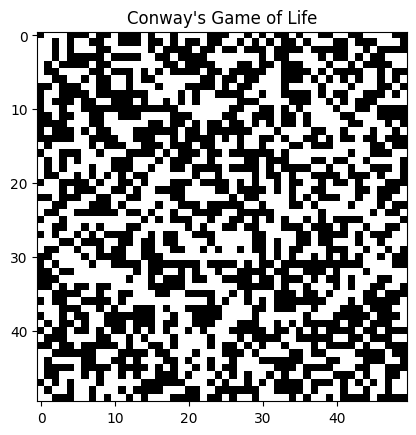

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to count the number of live neighbors for each cell
def count_neighbors(grid):
    # Create a kernel that represents the relative positions of neighbors
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])

    # Use convolution to count neighbors, edge cells are treated as having zero neighbors
    return np.pad(np.convolve(grid, kernel, mode='same'), 1, mode='constant', constant_values=0)

# Function to implement one step of the Game of Life
def game_of_life_step(grid):
    # Count neighbors of each cell
    neighbors = count_neighbors(grid)

    # Apply the Game of Life rules
    new_grid = (neighbors == 3) | ((grid == 1) & (neighbors == 2))

    return new_grid.astype(int)

# Function to generate a random initial grid
def random_grid(rows, cols):
    return np.random.randint(0, 2, size=(rows, cols))

# Visualization using matplotlib
def animate(i, img, grid):
    grid[:] = game_of_life_step(grid)  # Update the grid
    img.set_data(grid)  # Update the image data
    return img,

# Create an initial random grid
rows, cols = 50, 50
grid = random_grid(rows, cols)

# Set up the figure for plotting
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='gray', interpolation='nearest')
ax.set_title("Conway's Game of Life")

# Create an animation
ani = animation.FuncAnimation(fig, animate, fargs=(img, grid), interval=100, save_count=50)

plt.show()


#### 89. How to get the n largest values of an array (★★★)

In [27]:
import heapq

# Example array
arr = [1, 3, 5, 7, 9, 2, 4, 6, 8]

# Get the 3 largest values
n_largest = heapq.nlargest(3, arr)

print(n_largest)


[9, 8, 7]


#### 90. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item) (★★★)

In [26]:
import itertools

def cartesian_product(*vectors):
    # Use itertools.product to compute the Cartesian product
    return list(itertools.product(*vectors))

# Example usage
A = [1, 2]
B = ['a', 'b']
C = [True, False]

result = cartesian_product(A, B, C)
print(result)

[(1, 'a', True), (1, 'a', False), (1, 'b', True), (1, 'b', False), (2, 'a', True), (2, 'a', False), (2, 'b', True), (2, 'b', False)]


#### 91. How to create a record array from a regular array? (★★★)

In [14]:
regular_array = np.array([
    [1, 2.5, 3],
    [4, 5.5, 6],
    [7, 8.5, 9]
])

# Convert to record array
record_array = np.core.records.fromarrays(
    regular_array.T,  # Transpose to map rows to fields
    names="field1, field2, field3",
    formats="i4, f4, i4"  # Data types: int32, float32, int32
)

# Access fields by name
print("Field 1:", record_array.field1)
print("Field 2:", record_array.field2)
print("Field 3:", record_array.field3)


Field 1: [1 4 7]
Field 2: [2.5 5.5 8.5]
Field 3: [3 6 9]


#### 92. Consider a large vector Z, compute Z to the power of 3 using 3 different methods (★★★)

In [11]:
Z = np.random.rand(1_000_000)  # Large vector with 1 million random elements

# Method 1: Using the exponentiation operator
Z_cubed_1 = Z ** 3

# Method 2: Using np.power()
Z_cubed_2 = np.power(Z, 3)

# Method 3: Using repeated multiplication
Z_cubed_3 = Z * Z * Z

# Verify that all methods produce the same result
assert np.allclose(Z_cubed_1, Z_cubed_2)
assert np.allclose(Z_cubed_1, Z_cubed_3)

print("All methods produce the same result.")


All methods produce the same result.


#### 93. Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B? (★★★)

In [10]:

# Example arrays
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [1, 5, 9],
    [2, 4, 6],
    [7, 1, 3],
    [8, 2, 4],
    [6, 5, 3]
])

B = np.array([
    [1, 5],
    [7, 3]
])

# Find rows in A that contain all elements of each row in B
result = []
for b_row in B:
    # Create a mask for rows in A that contain all elements of b_row
    mask = np.array([set(b_row).issubset(set(a_row)) for a_row in A])
    result.append(A[mask])

# Combine results for each row of B
filtered_rows = np.vstack(result)

print("Filtered Rows in A that contain elements of B:")
print(filtered_rows)


Filtered Rows in A that contain elements of B:
[[1 5 9]
 [7 1 3]]


#### 94. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3]) (★★★)

In [9]:
# Example 10x3 matrix
matrix = np.array([
    [1, 1, 1],
    [2, 3, 2],
    [4, 4, 4],
    [5, 6, 7],
    [8, 8, 8],
    [9, 9, 10],
    [11, 12, 11],
    [13, 13, 13],
    [14, 15, 14],
    [16, 16, 16],
])

# Identify rows with unequal values
mask = ~np.all(matrix == matrix[:, 0][:, None], axis=1)

# Extract rows with unequal values
unequal_rows = matrix[mask]

print("Rows with unequal values:")
print(unequal_rows)

Rows with unequal values:
[[ 2  3  2]
 [ 5  6  7]
 [ 9  9 10]
 [11 12 11]
 [14 15 14]]


#### 95. Convert a vector of ints into a matrix binary representation (★★★)

In [8]:
def int_to_binary_matrix(vector, num_bits=None):

    # Ensure the vector is a numpy array
    vector = np.array(vector, dtype=int)

    # Determine the number of bits if not provided
    if num_bits is None:
        num_bits = int(np.ceil(np.log2(vector.max() + 1)))

    # Convert each integer to binary and fill up to the desired number of bits
    binary_matrix = ((vector[:, None] & (1 << np.arange(num_bits))) > 0).astype(int)

    # Reverse bits to match standard binary representation
    return binary_matrix[:, ::-1]

# Example usage
vector = [3, 7, 1, 0, 8]
binary_matrix = int_to_binary_matrix(vector)
print("Binary Representation Matrix:")
print(binary_matrix)

Binary Representation Matrix:
[[0 0 1 1]
 [0 1 1 1]
 [0 0 0 1]
 [0 0 0 0]
 [1 0 0 0]]


#### 96. Given a two dimensional array, how to extract unique rows? (★★★)

In [7]:
# Example 2D array
arr = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [1, 2, 3],
    [7, 8, 9]
])

# Extract unique rows
unique_rows = np.unique(arr, axis=0)

print("Original Array:")
print(arr)
print("\nUnique Rows:")
print(unique_rows)

Original Array:
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [7 8 9]]

Unique Rows:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### 97. Considering 2 vectors A & B, write the einsum equivalent of inner, outer, sum, and mul function (★★★)

In [6]:
# Inner Product
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

inner_product = np.einsum('i,i->', A, B)
print("Inner Product:", inner_product)
# Equivalent to np.dot(A, B)

Inner Product: 32


#### 98. Considering a path described by two vectors (X,Y), how to sample it using equidistant samples (★★★)?

In [5]:
from scipy.interpolate import interp1d

def sample_equidistant(X, Y, num_samples):
    """
    Sample a path (X, Y) using equidistant points.

    Parameters:
        X (array-like): X coordinates of the path.
        Y (array-like): Y coordinates of the path.
        num_samples (int): Number of equidistant samples to generate.

    Returns:
        sampled_X (ndarray): X coordinates of equidistant samples.
        sampled_Y (ndarray): Y coordinates of equidistant samples.
    """
    # Ensure X and Y are numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    # Calculate distances between consecutive points
    distances = np.sqrt(np.diff(X)**2 + np.diff(Y)**2)

    # Cumulative distance along the path
    cumulative_distance = np.insert(np.cumsum(distances), 0, 0)

    # Create equidistant target distances
    total_distance = cumulative_distance[-1]
    target_distances = np.linspace(0, total_distance, num_samples)

    # Interpolate X and Y based on target distances
    interp_func_X = interp1d(cumulative_distance, X, kind="linear")
    interp_func_Y = interp1d(cumulative_distance, Y, kind="linear")

    sampled_X = interp_func_X(target_distances)
    sampled_Y = interp_func_Y(target_distances)

    return sampled_X, sampled_Y

# Example usage
X = [0, 1, 4, 6]
Y = [0, 2, 3, 5]
num_samples = 10

sampled_X, sampled_Y = sample_equidistant(X, Y, num_samples)
print("Sampled X:", sampled_X)
print("Sampled Y:", sampled_Y)

Sampled X: [0.         0.40879163 0.81758325 1.48021363 2.34739162 3.21456961
 4.06093106 4.70728738 5.35364369 6.        ]
Sampled Y: [0.         0.81758325 1.6351665  2.16007121 2.44913054 2.73818987
 3.06093106 3.70728738 4.35364369 5.        ]


#### 99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. (★★★)

In [4]:

def select_multinomial_rows(X, n):
    """
    Select rows from X that can be interpreted as draws from a multinomial distribution with n degrees.

    Parameters:
        X (ndarray): A 2D numpy array.
        n (int): The multinomial degree.

    Returns:
        ndarray: A filtered 2D numpy array containing rows valid for the multinomial distribution.
    """
    # Ensure X is a numpy array
    X = np.array(X)

    # Condition 1: Rows contain only integers
    is_integer = np.all(np.mod(X, 1) == 0, axis=1)

    # Condition 2: Rows sum to n
    sums_to_n = np.sum(X, axis=1) == n

    # Select rows satisfying both conditions
    valid_rows = X[is_integer & sums_to_n]

    return valid_rows

# Example usage
X = np.array([[3, 2, 5], [1.5, 2.5, 6], [4, 3, 3], [5, 3, 2]])
n = 10
result = select_multinomial_rows(X, n)
print("Rows valid for multinomial distribution:")
print(result)


Rows valid for multinomial distribution:
[[3. 2. 5.]
 [4. 3. 3.]
 [5. 3. 2.]]


#### 100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). (★★★)

In [3]:
import pandas as pd

# Example dataset (replace this with your actual data)
data = np.random.normal(loc=50, scale=10, size=1000)  # A normal distribution

# Parameters
N = 100  # Number of samples
sample_size = 30  # Size of each sample
percentiles = [25, 50, 75]  # Desired percentiles

# Step 1: Sampling and Computing Means
sample_means = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(N)]

# Step 2: Compute Percentiles over the Means
percentile_values = np.percentile(sample_means, percentiles)

# Display Results
print("Sample Means Percentiles:")
for perc, value in zip(percentiles, percentile_values):
    print(f"{perc}th Percentile: {value:.2f}")


Sample Means Percentiles:
25th Percentile: 48.23
50th Percentile: 49.55
75th Percentile: 51.08
